In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Etude des cancers du poumon

https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

## Chargement des données

In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
df = data.frame.reset_index() # pour générer un id unique

In [4]:
df.sample(5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
419        11.16         21.41           70.95      380.3          0.10180   
297        11.76         18.14           75.00      431.1          0.09968   
180        27.22         21.87          182.10     2250.0          0.10940   
474        10.88         15.62           70.41      358.9          0.10070   
139        11.28         13.39           73.00      384.8          0.11640   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
419           0.05978        0.008955              0.01076         0.1615   
297           0.05914        0.026850              0.03515         0.1619   
180           0.19140        0.287100              0.18780         0.1800   
474           0.10690        0.051150              0.01571         0.1861   
139           0.11360        0.046350              0.04796         0.1771   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
419                 0.06144  ...          28.92            79.26       458.0   
297                 0.06287  ...          23.39            85.10       553.6   
180                 0.05770  ...          32.85           220.80      3216.0   
474                 0.06837  ...          19.35            80.78       433.1   
139                 0.06072  ...          15.77            76.53       434.0   

     worst smoothness  worst compactness  worst concavity  \
419            0.1282            0.11080          0.03582   
297            0.1137            0.07974          0.06120   
180            0.1472            0.40340          0.53400   
474            0.1332            0.38980          0.33650   
139            0.1367            0.18220          0.08669   

     worst concave points  worst symmetry  worst fractal dimension  target  
419               0.04306          0.2976                  0.07123       1  
297               0.07160          0.1978                  0.06915       0  
180               0.26880          0.2856                  0.08082       0  
474               0.07966          0.2581                  0.10800       1  
139               0.08611          0.2102                  0.06784       1  

[5 rows x 31 columns]

> la colonne target est celle que nous allons tenter de prédire

## Exploration préliminaire

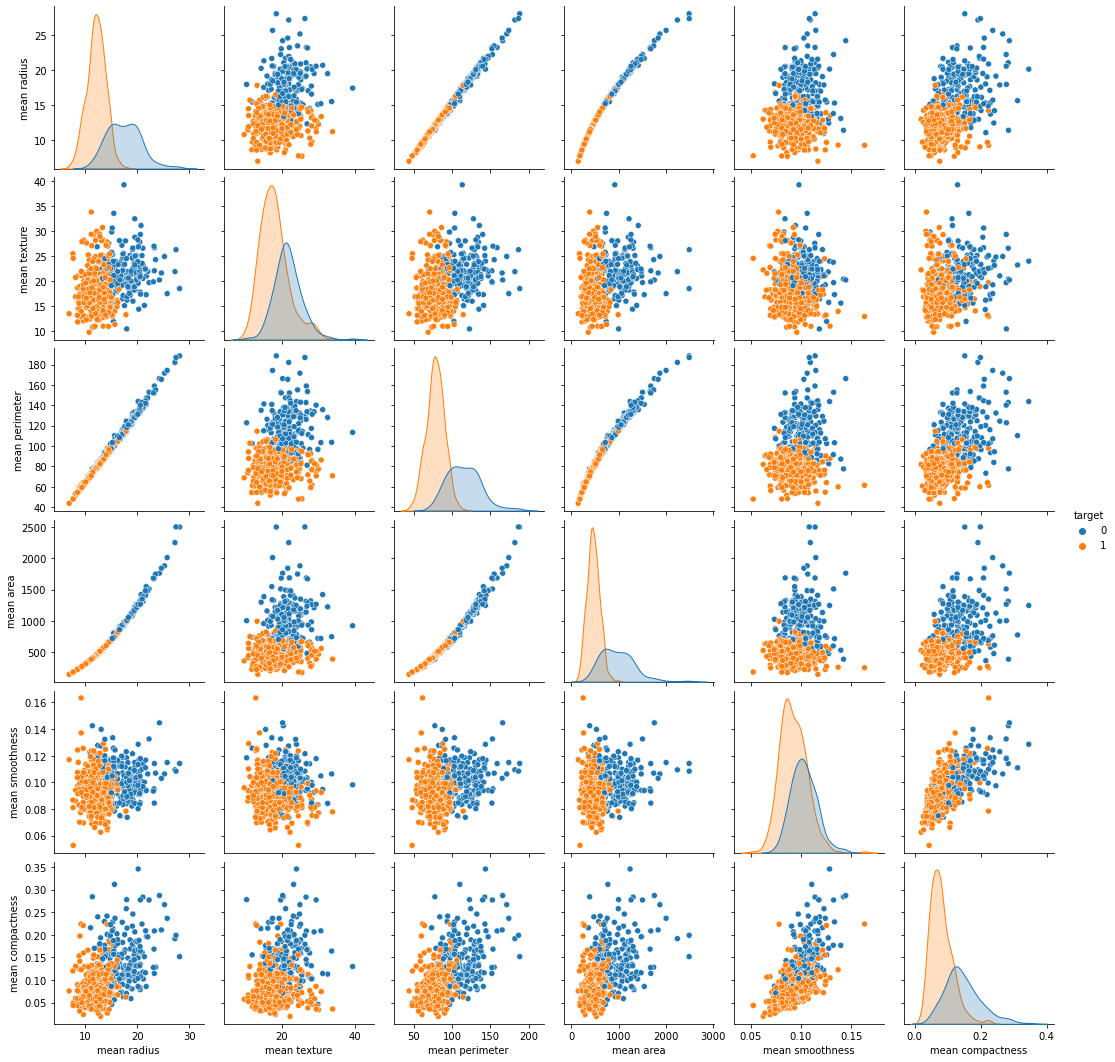

In [6]:
sns.pairplot(df, hue = 'target', vars = df.columns[:6]);

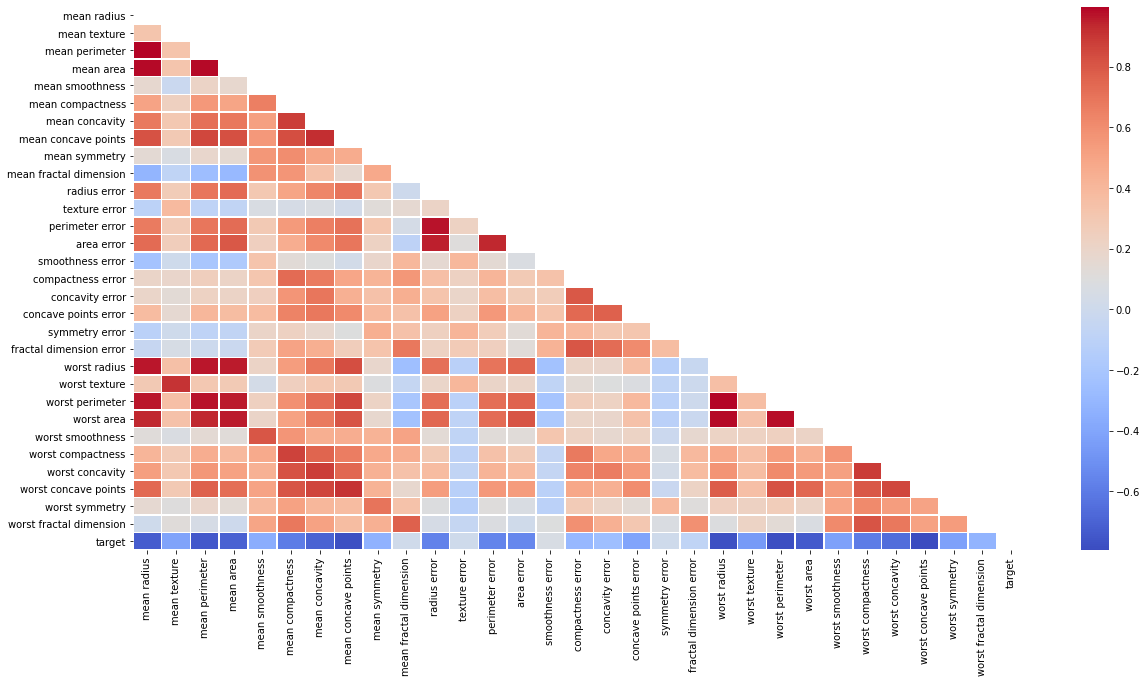

In [7]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap= 'coolwarm', mask=np.triu(df.corr()), linewidths=0.5);

##  Split pour constituer un jeu de validation

On continue sur datiku ;)

![](img/split.png)

- partez d'une recette python pour charger le dataset breast_cancer (attention : la version de sklearn utilisée par defaut est la 0.20, la syntaxe a un peu changé sur la 0.24)
- conservez 10% des données pour la validation

## Création du modèle

![](img/model.png)

- séléctionnez une tache de classification dans le lab pour prédire la colonne `target`

### Evaluation du modèle

https://academy.dataiku.com/path/ml-practitioner/machine-learning-basics/546063

- observez chacun des deux modèles entrainés
- identifiez les variables les plus importantes
- observez les explications individuelles pour les probabilités extrèmes
- analysez les performances de votre modèle, sur la matrice de confusion, la courbe ROC, la courbe de densité (a-t-on deux distributions qui ne se recouvrent pas?) et la page des metrics

### Déploiement du modèle

https://academy.dataiku.com/path/ml-practitioner/scoring-basics/550416

- Déployez le meilleur modèle.

## Score du dataset de validation

https://academy.dataiku.com/path/ml-practitioner/scoring-basics/550421

![](img/score.png)

- Réalisez une jointure entre cancer_unlabeled et cancer_unlabeled_prepared_scored sur l'index
- Preparez ce dernier dataset pour créer une colonne prédiction_valide qui indique si `prediction` est égale à `target`
- Analysez cette colonne pour obtenir le taux prédictions justes
- Utilisez une recette d'évaluation pour obtenir plus de métriques sur les prédictions réalisées

# Titanic et kaggle

https://www.kaggle.com/c/titanic

## Récupération des données

- Inscrivez-vous à la compétition et récupérez les deux datasets : train.csv et test.csv
- utilisez une recette de préparation sur train.csv (elle nous servira plus tard)
- entrainez des modèles sur le dataset préparé
- déployez le meilleur modèle
- utilisez votre modèle pour scorer le dataset `test.csv` (conservez uniquement la colonne PassengerId)
- préparez votre dataset scoré pour obtenir un dataset avec deux colonnes comme dans l'exemple suivant

In [8]:
pd.read_csv('submission.csv')

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0

- vous pouvez exporter votre fichier csv et le soumettre sur kaggle, et voir à quel rang vous vous placez
- testez avec d'autres modèles (xgboost, deep learning)

## Préparation des données

Le choix du modèle ne fait pas tout, même un algorithme très performant ne peut pas remplacer une bonne phase de préparation. 

- gérez le cas des valeurs manquantes
- gérez le cas des valeurs catégorielles

# Wine dataset

https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset

In [2]:
from sklearn.datasets import load_wine

data = load_wine(as_frame=True)
df = data.frame.reset_index() # pour générer un id unique

In [3]:
df.sample(5)

index  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
144    144    12.25        3.88  2.20               18.5      112.0   
6        6    14.39        1.87  2.45               14.6       96.0   
115    115    11.03        1.51  2.20               21.5       85.0   
116    116    11.82        1.47  1.99               20.8       86.0   
165    165    13.73        4.36  2.26               22.5       88.0   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
144           1.38        0.78                  0.29             1.14   
6             2.50        2.52                  0.30             1.98   
115           2.46        2.17                  0.52             2.01   
116           1.98        1.60                  0.30             1.53   
165           1.28        0.47                  0.52             1.15   

     color_intensity   hue  od280/od315_of_diluted_wines  proline  target  
144             8.21  0.65                          2.00    855.0       2  
6               5.25  1.02                          3.58   1290.0       0  
115             1.90  1.71                          2.87    407.0       1  
116             1.95  0.95                          3.33    495.0       1  
165             6.62  0.78                          1.75    520.0       2

# Digit recognizer

https://www.kaggle.com/c/digit-recognizer/overview

# D'autres petits datasets

https://scikit-learn.org/stable/datasets/toy_dataset.html

# Et ensuite?

## Creuser des taches spécifiques en ML

- https://academy.dataiku.com/path/ml-practitioner/nlp-the-visual-way-1
- https://academy.dataiku.com/image-classification-with-code
- https://academy.dataiku.com/reinforcement-learning-open et 

## Tester les algos de deeplearning (keras, tensorflow, ...)

- Un mini-cours : https://www.kaggle.com/learn/intro-to-deep-learning
- Des projets : https://www.freecodecamp.org/learn/machine-learning-with-python/#machine-learning-with-python-projects